# Project 2: Ames House Price Prediction 

## Notebook Navigation:
1. **Visualization and Eda** <br>
    1. [Background](#background)
    2. [Problem Statement](#problem-statement)
    3. [Data Import](#data-import)
    4. [Data Overview](#data-overview)
    5. [Exploratory Data Analysis](#exploratory-data-analysis)
2. Preprocessing, Modeling and Evaluation

## Background

Buying a house is seen as a big purchase. Many factors can affect the price, starting from external factor such as economic situation and internal factor such as house features. In this project, we have the housing price data along with the features of each house.

## Problem Statement

This project is overlooking the housing sale in Ames, Iowa, USA. We will take a look on the house features from houses sold in Ames. These questions are some questions that we would like to find out:
1. What features increase the saleprice?
2. What features reduce the saleprice?

The goal of this project it to **predict the saleprice based on the features given**, which will benefit both homeowners and potential home buyers to make a data-driven estimated price based on the features of the house that they are selling or looking for.

First, we will understand the training set features first and handle missing values. Then, we will be doing feature selection, scaling and train-test-split followed by linear regression models. Performance measurement is using **R2 score** which gives use the percentage of variability that can be explained using this model and **Root Mean Squared Error** to see how well our prediction is.


### Data Import

In [8]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
import missingno as msno

%matplotlib inline
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
sns.set_style('white')

In [9]:
train = pd.read_csv('../data/train.csv')
train.shape

(2051, 81)

In [10]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

### Data Overview

In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


**Data Overview Summary** <br>
Data contains 2051 samples of residential properties sold between 2006 to 2010 in Ames, Iowa. There are 81 features provided in this dataset. If you would like to know what each feature is refering to, [click here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

Data types found in these datasets are:
1. Numerical Data
    - Discrete: id number
    - Continuous: lot area
2. Categorical data: 
    - Nominal: Proximity to various conditions
    - Ordinal: overall score of house condition

Features can be categorized:
1. Time: year build, month sold, when it was remodelled
2. House Features: size, shape, style, external condition, basement
3. House Location: land contour, neighbourhood

The dataset has houses built in 1872-2010 with size ranging from 1300 to 159,000 sqrf. Some of the houses sold may have been remodeled as well. Overall the condition of the houses sold tend to be in average condition. 

On average, the house sold has basement of 1058 sqrft with first floor of 1164 sqrft and second floor of 329 sqrft. The living area varies from 334 to 5642 sqr ft with garage size of 473 sqrft. 

The price ranges from $12,789 to  $611657

## Exploratory Data Analysis

In [13]:
#POWER TRANSFORMER TO MAKE IT TO NORMAL CLASSIFICATION, NEED TO RETURN THE INVERSE

In [14]:
train.columns=train.columns.str.lower().str.replace(' ','_')
#defining the columns
num_col = [
    'id','pid','lot_frontage', 'lot_area','year_built','year_remod/add','mas_vnr_area', 
    'bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf', 'total_bsmt_sf','1st_flr_sf', '2nd_flr_sf', 
    'low_qual_fin_sf','gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath','half_bath',
    'bedroom_abvgr', 'kitchen_abvgr','totrms_abvgrd', 'fireplaces','garage_yr_blt','garage_cars',
    'garage_area','wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch','screen_porch', 
    'pool_area', 'misc_val','mo_sold', 'yr_sold','saleprice'
]

cat_col = [
    'ms_subclass', 'ms_zoning','street','alley','lot_shape', 'land_contour','utilities', 'lot_config',
    'land_slope', 'neighborhood','condition_1', 'condition_2', 'bldg_type','house_style', 'overall_qual',
    'overall_cond','roof_style', 'roof_matl', 'exterior_1st','exterior_2nd', 'mas_vnr_type','exter_qual',
    'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2',
    'heating', 'heating_qc', 'central_air','electrical','kitchen_qual','functional','fireplace_qu','garage_type',
    'garage_finish','garage_qual', 'garage_cond', 'paved_drive','pool_qc','fence','misc_feature','sale_type'
]

def histo_vis(df):
    fig, ax = plt.subplots(nrows=15, ncols=3,figsize=(12, 15*3))
    ax=ax.ravel()
    for i, column in enumerate(cat_col):
        sns.histplot(df[column],bins=15,ax=ax[i])
        ax[i].tick_params(labelsize=10)
        ax[i].set_title(column)
    plt.tight_layout()

def box_vis(df):
    rows = 18
    fig, ax = plt.subplots(nrows=18, ncols=4,figsize=(15, 18*3))
    ax=ax.ravel()
    for i, column in enumerate(num_col):
        sns.scatterplot(x=df[column],y=df['saleprice'],legend='brief',ax=ax[i*2+1],sizes=1)
        ax[i*2+1].set_title(column)

        sns.boxplot(y=df[column],width=0.3,ax=ax[i*2])
        ax[i*2].set_title(column)
    plt.tight_layout()

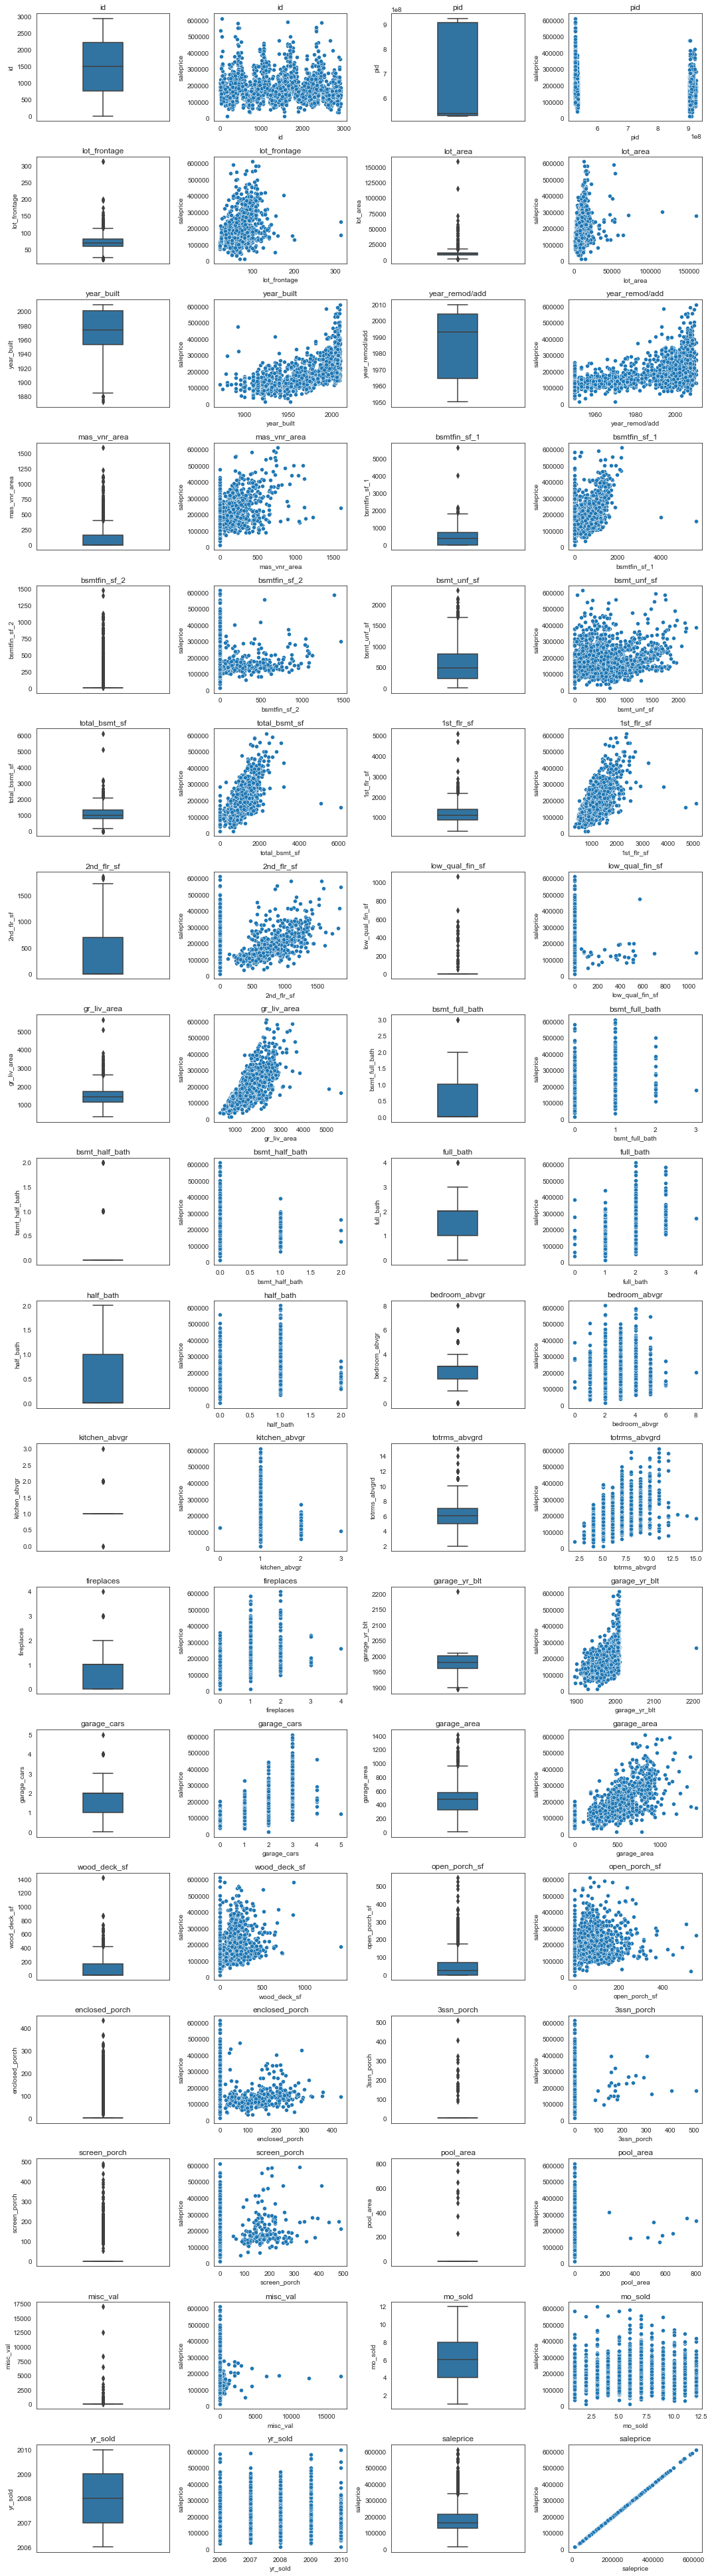

In [15]:
box_vis(train)

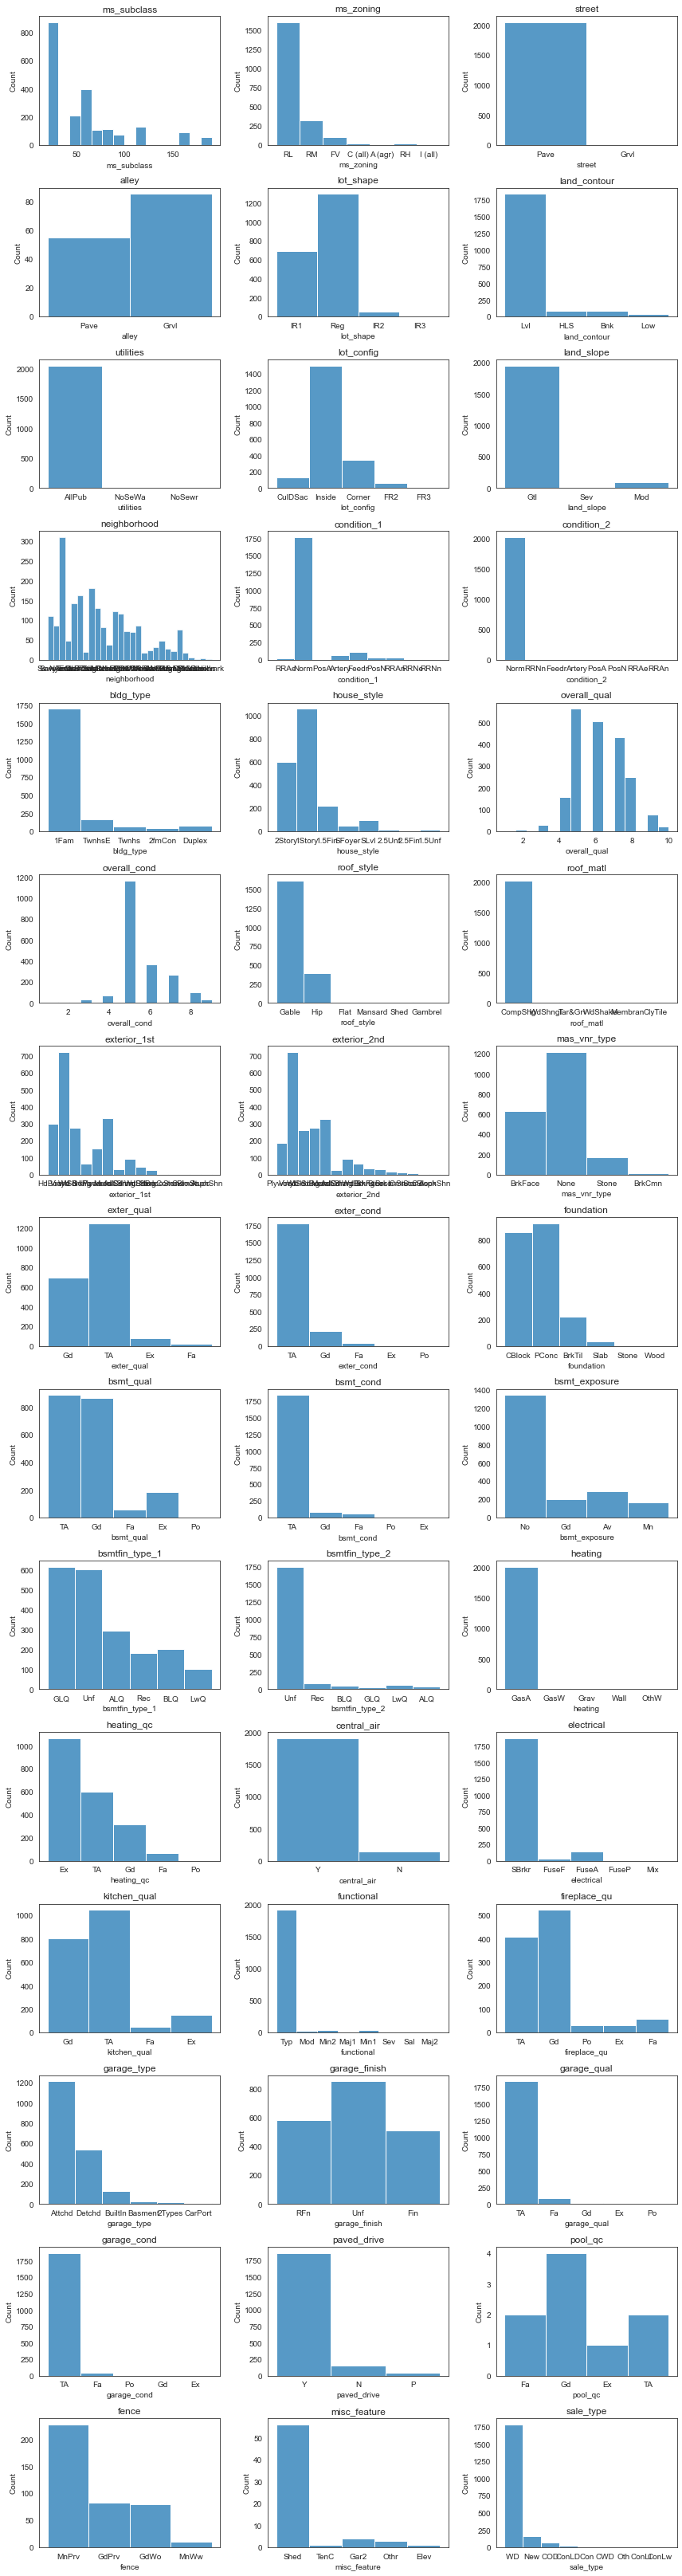

In [16]:
histo_vis(train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


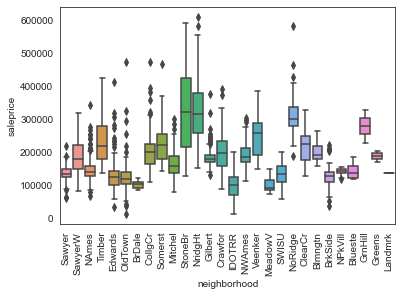

In [37]:
fig,ax = plt.subplots()
sns.boxplot(train['neighborhood'],train['saleprice'])
ax.tick_params(axis='x', rotation=90)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='overall_qual', ylabel='saleprice'>

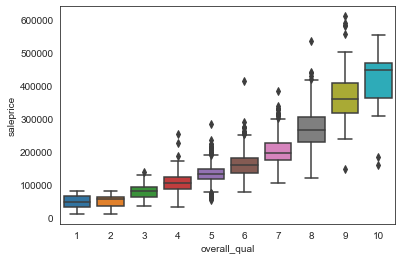

In [38]:
fig,ax = plt.subplots()
sns.boxplot(train['overall_qual'],train['saleprice'])

For some of numerical column, we can see that there are few observations:
- Few of our data has outliers such as for lot frontage, lot area, year build, etc
    - Lot frontage and lot area: there are houses with very big area but not the most expensive house sold. This also observed in some house features such as basement area, general living area and total rooms above grade.
- Year built: there are some house even before 1880 while most of them are from 1950-2001
- Most houses sold don't have pool, but the largest one has pool > 800 sqr ft
- Most houses sold in June and while generally the number of houses sold range between 400-500 houses annually, there is a drop in 2010
- We can see some linear correlations on some features such as:
    1. Age: year built, year remod
    2. Area: Basement area, 1sr floor area, 2nd floor area, general living area, and garage area

- There might be some errors for example garage year built column has data above 2200 while our data only has houses sold till 2010. Therefore, this might be an error

### Missing Values

<AxesSubplot:>

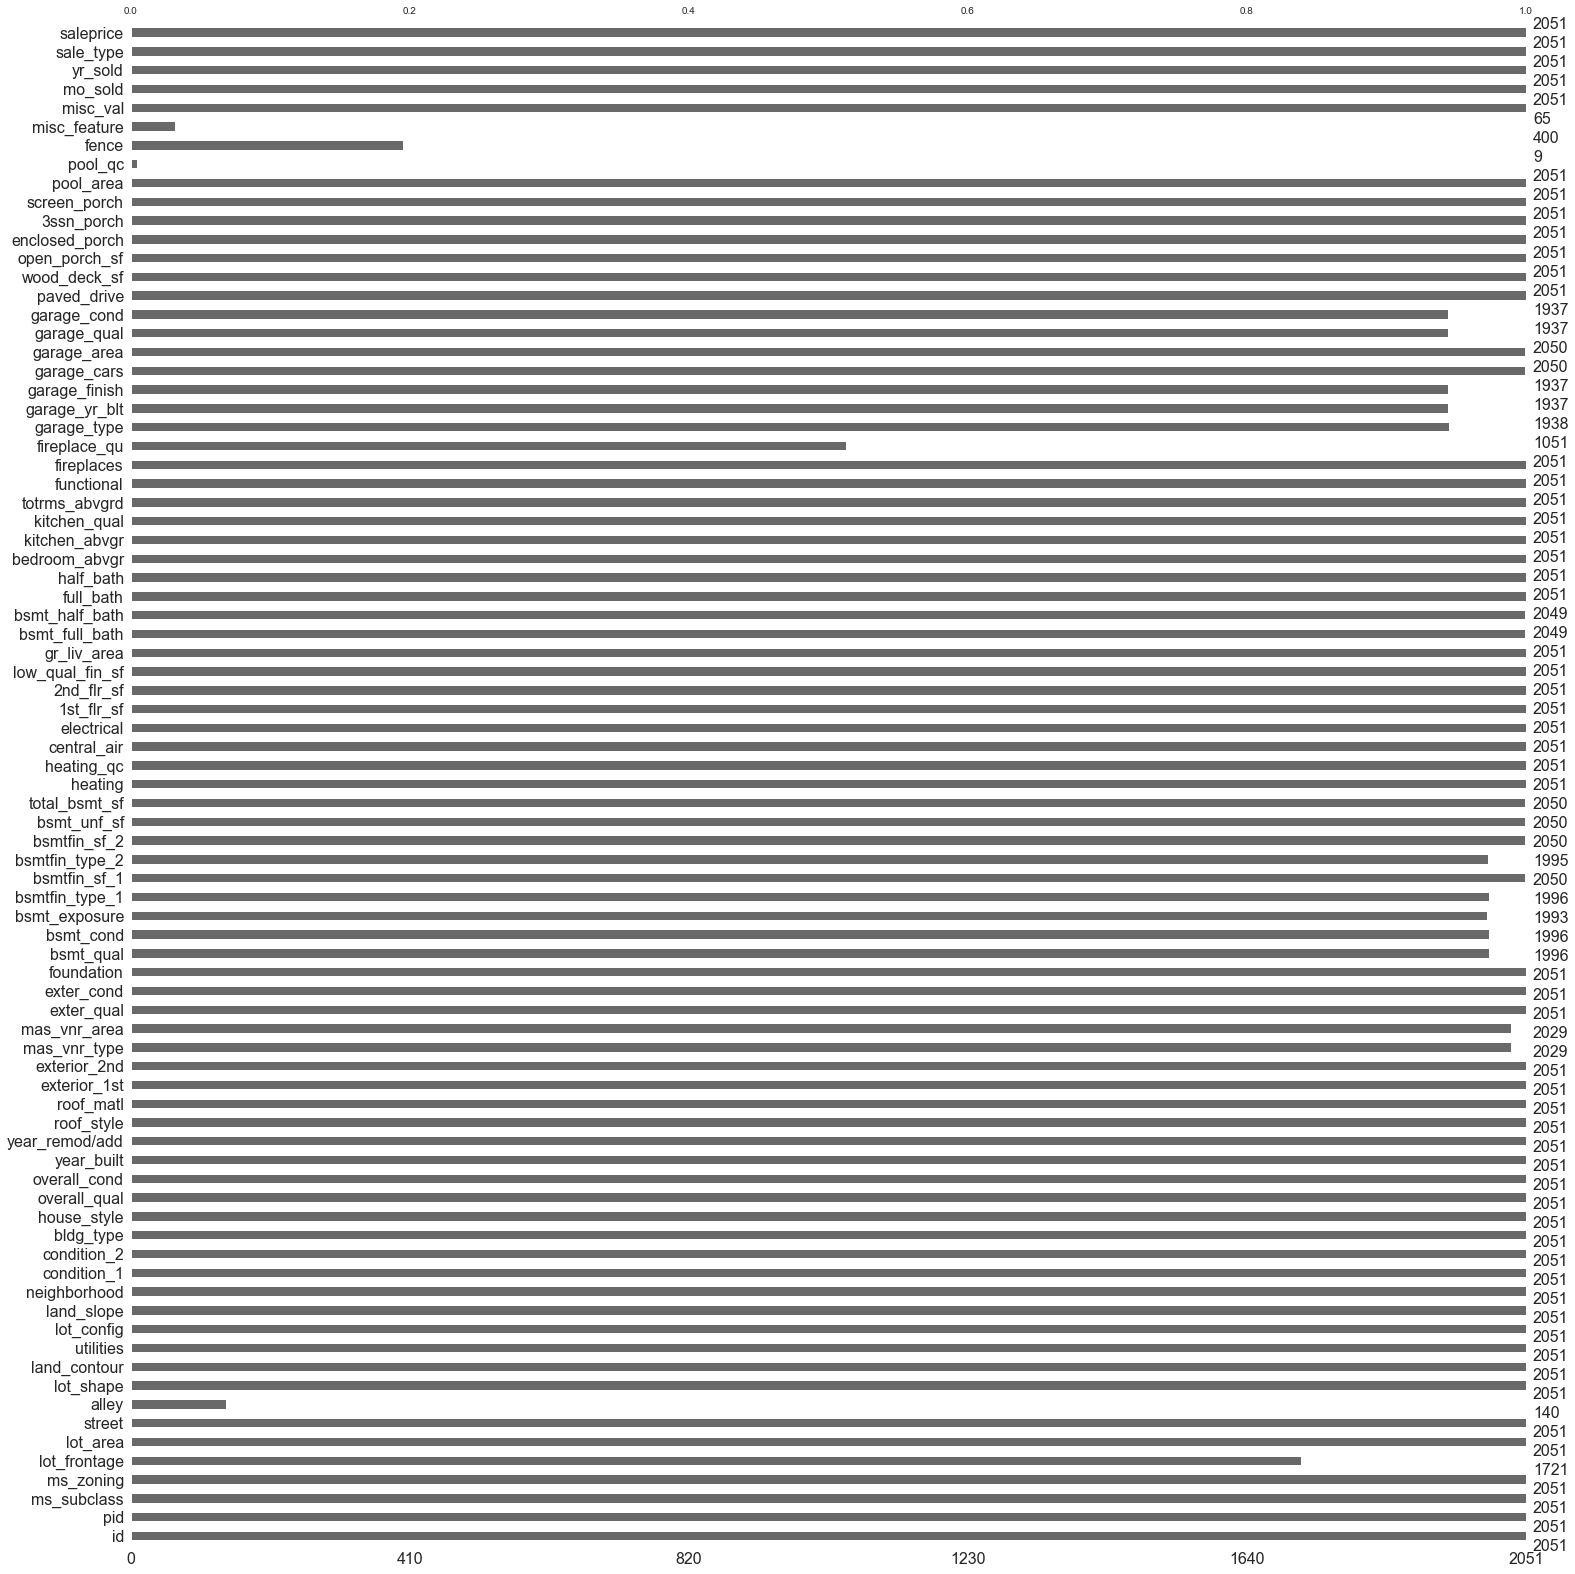

In [17]:
#handling null values
msno.bar(train)

In [18]:
#columns with null values
null_abv_80 = []
null_bel_80 = []
threshold = 2051*0.8
for col in train.columns:
    if train[col].isnull().sum() > threshold:
        null_abv_80.append(col)
    elif train[col].isnull().sum() > 0:
        null_bel_80.append(col)
print('Columns with null values more than 80%: ',null_abv_80)
print('Columns with null values below than 80%: ',null_bel_80)

Columns with null values more than 80%:  ['alley', 'pool_qc', 'fence', 'misc_feature']
Columns with null values below than 80%:  ['lot_frontage', 'mas_vnr_type', 'mas_vnr_area', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath', 'fireplace_qu', 'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_cars', 'garage_area', 'garage_qual', 'garage_cond']


### Correlation on Top 15 Features

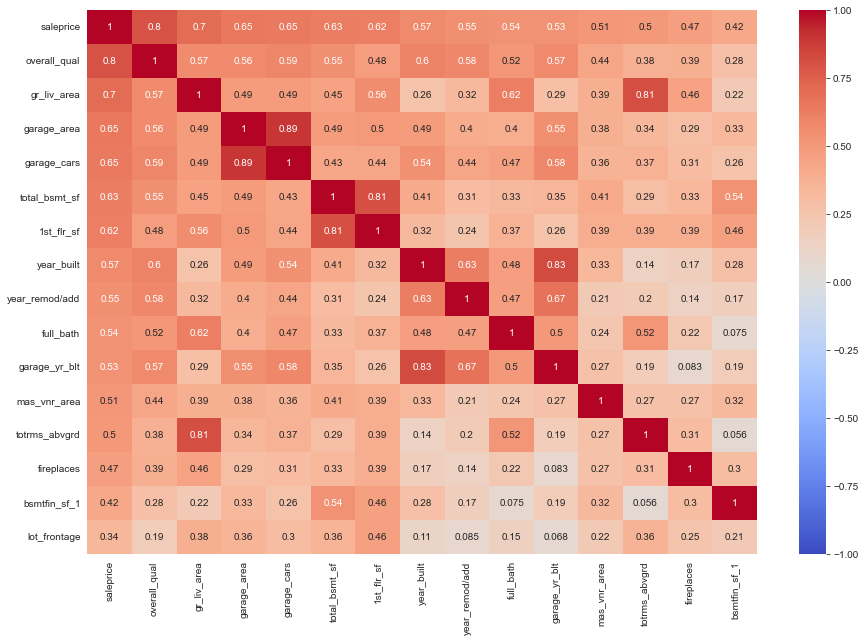

In [19]:
train_corr = pd.DataFrame(train.corr()[['saleprice']].sort_values(by= 'saleprice',ascending=False))

plt.figure(figsize=(15,10))
sns.heatmap(train.corr()[train_corr[:15].index].sort_values('saleprice',ascending=False).head(16),annot=True,cmap='coolwarm',vmin=-1,vmax=1);

### Looking at Univariate Columns

In [20]:
univariate_col = []
for col in cat_col:
    if train[col].value_counts(normalize=True).max() > 0.9:
        univariate_col.append(col)
univariate_col

['street',
 'utilities',
 'land_slope',
 'condition_2',
 'roof_matl',
 'bsmt_cond',
 'heating',
 'central_air',
 'electrical',
 'functional',
 'garage_qual',
 'garage_cond',
 'paved_drive']

There are few pointers we can get from this EDA analysis:
1. Top 5 features with correlation with Saleprice are mostly related to area:
    - overall quality
    - general living area
    - garage area
    - garage cars (can refer to the same thing as garage area)
    - total basement area
2. There are columns that might be related to each other, shown by the high correlation between the features. Setting threshold at 85% (Multicollinearity):
    - Both garage cars and garage area explain the size of garage just in terms of different measurements (89% correlation)
3. There are columns with 80% missing values. Missing values will affect our model in predicting the target because when we impute so many things inside a column, we might skew the data.
4. There are columns with univariate columns in categorical data (>85%). There are 13 features with one class dominating the features, we will drop these features.
    - street
    - utilities
    - land_slope
    - condition_2
    - roof_matl
    - bsmt_cond
    - heating
    - central_air
    - electrical
    - functional
    - garage_qual
    - garage_cond
    - paved_drive


In [22]:
train['saleprice_log']  = np.log(train['saleprice'])

Text(0, 0.5, 'Frequency')

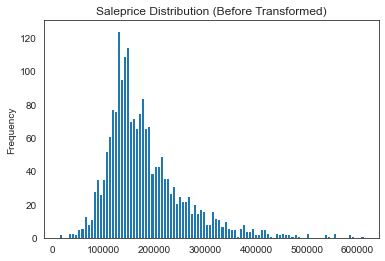

In [26]:
plt.hist(train['saleprice'],bins=100);
plt.title('Saleprice Distribution (Before Transformed)') #right skewed data
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

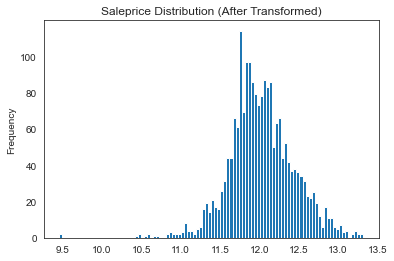

In [27]:
plt.hist(train['saleprice_log'],bins=100);
plt.title('Saleprice Distribution (After Transformed)')#normally distributed
plt.ylabel('Frequency')